<a href="https://colab.research.google.com/github/khushie00/EDA-ON-NETFLIX/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

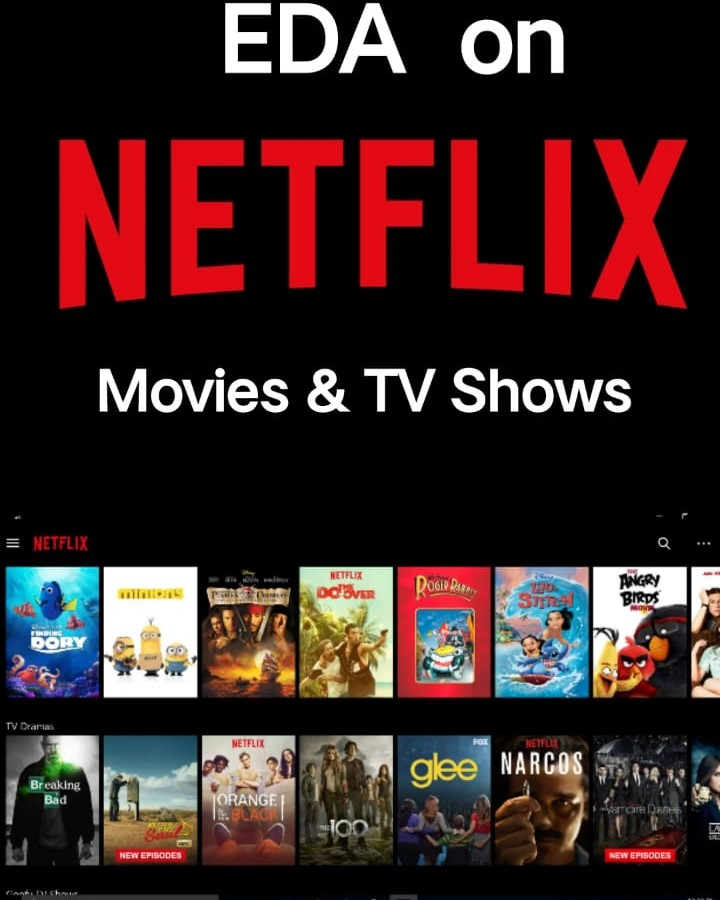

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset
# Reading the input file
df= pd.read_csv('/content/netflix_titles.csv')

In [ ]:
# Display top 5 records
df.head()

In [ ]:
# Display last 5 records
df.tail()

In [ ]:
# To see the high level data details
df.info()

Observations:
1. The above code shows that there are some null values in the data

2. Shows the total rows, name and number of columns and their datatypes

In [ ]:
#column
df.columns

Observations:

It shows all the colums of the record

In [ ]:
# Rating data is mentioned incorrectly for few titles in the input file. Hence correcting it by checking the Maturity rating online

df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})


In [ ]:
#unique
df['rating'].unique()

In [ ]:
# Renaming vaules for Rating for better understanding
# Source : https://help.netflix.com/en/node/2064
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'

})


In [ ]:
df['rating'].unique()

In [ ]:
# Creating new columns

df['month'] = pd.DatetimeIndex(df['date_added']).month

In [ ]:
df.head()

In [ ]:
# Total Shows and movies
df_count = df['show_id'].count().sum()
print(df_count)
# Split of shows and TV
df_type = df.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {"show_id":"count_showids"})

In [ ]:
print(df['type'].replace(['Movies','TV Shows'],[0,1],inplace=True))

In [ ]:
#converting categorical data into integer
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [ ]:
#Check for Duplicate values
df.duplicated().sum()

Observation:

No duplicate values present

In [ ]:
#some of the oldest movies
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

# ***Data Visualisation***



Using a consistent color palette is a great way to give your work credibility. It looks professional, and keeps the reader engaged.

It's an easy-to-implement tip that really helps.

In [ ]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

#Type: Movie and TV Shows

In [ ]:
#barplot
counts=df['type'].value_counts()
print(counts.plot(kind='bar',color='black'))
sns.set_style('whitegrid')
ax = sns.barplot(x=counts.index, y=counts.values, palette='bright')
ax.set_xlabel('type')
plt.xticks(rotation=45)
ax.set_ylabel('count')
plt.title('type',size=24)
plt.show()

#Pie-chart for the Type: Movie and TV Shows

In [ ]:
#piechart
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

#Relation between Type and Rating

In [ ]:
#countplot
plt.figure(figsize=(10,10))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

#Rating of shows and movies

In [ ]:
counts=df['rating'].value_counts()
print(counts.plot(kind='bar',color='black'))
sns.set_style('whitegrid')
ax = sns.barplot(x=counts.index, y=counts.values, palette='bright')
ax.set_xlabel('rating')
plt.xticks(rotation=45)
ax.set_ylabel('count')
plt.title('rating',size=24)
plt.show()

#Pie-chart for Rating

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(str(df.cast)))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

In [ ]:
#Count plot for Movies with passing Years
sns.countplot(x='release_year', data=df).set_title('Count plot for Movies with passing Years.')
sns.set(rc={'figure.figsize':(10,20)})
plt.show()

In [ ]:
sns.heatmap(df.isnull())         # using heatmap to shows the null value count

Observation

From the above output we can see that director , cast ,country columns contains maximum null values. We will see how to deal with them.



# pandas-profiling

In [ ]:
pip install pandas-profiling

In [ ]:
import pandas as pd
df=pd.read_csv('/content/netflix_titles.csv')
df.head()

from pandas_profiling import ProfileReport
report=ProfileReport(df)
report.to_file("netflix_eda.html")

# Conclusions

We explore the Netflix dataset and saw how to clean the data and then jump into how to visualize the data with Exploratory Data Analysis. We saw some basic and advanced level charts of seaborn and matplotlib like Pie-chart, Bar chart, Countplot & Heatmap.
We see highest rating Tv show or Movies in dataset
Which month is best for movies realising and so on.

And also visualize a data with Pandas_Profiling.